In [12]:
%%javascript
Jupyter.keyboard_manager.command_shortcuts.add_shortcut('f5', {
    help : 'run cell',
    handler : function (event) {
        IPython.notebook.execute_cell();
        return false;}});
Jupyter.keyboard_manager.command_shortcuts.add_shortcut('ctrl-.', {
    help : 'run cell',
    handler : function (event) {
        IPython.notebook.execute_cell();
        return false;}});
Jupyter.keyboard_manager.edit_shortcuts.add_shortcut('f5', {
    help : 'run cell',
    handler : function (event) {
        IPython.notebook.execute_cell();
        return false;}});
Jupyter.keyboard_manager.edit_shortcuts.add_shortcut('ctrl-.', {
    help : 'run cell',
    handler : function (event) {
        IPython.notebook.execute_cell();
        return false;}});
Jupyter.keyboard_manager.edit_shortcuts.add_shortcut('ctrl-enter', {
    help : 'none',
    // 防止与 Sublime hotkey Ctrl+Enter 冲突
    handler : function (event) {
        return false;}});

var patch = {CodeCell: {cm_config:{indentUnit: 2}}}
Jupyter.notebook.get_selected_cell().config.update(patch)

// 依据 ipynb 文件名, 给 cell 加上特定的背景色
String.prototype.hashCode = function() {
  var hash = 0, i, chr;
  if (this.length === 0) return hash;
  for (i = 0; i < this.length; i++) {
    chr   = this.charCodeAt(i);
    hash  = ((hash << 5) - hash) + chr;
    hash |= 0; // Convert to 32bit integer
  }
  return hash;
};

function random_hue_color(label, s, l) {
  // console.log(Math.abs(label.hashCode()))
  var hash_color = (Math.abs(label.hashCode()) % 360) / 360 * 100
  return `hsl(${hash_color}, ${s}%, ${l}%)`
}

var notebook_path = IPython.notebook.notebook_path
var color1 = random_hue_color(notebook_path, 20, 90)
var color2 = random_hue_color(notebook_path, 40, 80)

var css = document.createElement("style")
css.type = "text/css"
css.innerHTML = `div.cell {background-color: ${color1};}`
css.innerHTML +=`div.running {background-color: ${color2};}`
css.innerHTML +=`div.running.selected {background-color: ${color2};}`
css.innerHTML +='</style>'
document.body.appendChild(css);


<IPython.core.display.Javascript object>

In [13]:
# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
%matplotlib inline

In [1]:
from math import pow, exp, factorial

class Poisson:

    def __init__(self, rate):
        self.rate = rate

    def prob_exactly(self, n, t):
        rate = self.rate * t
        return pow(rate, n) * exp(-rate) / factorial(n)

    def prob_at_least(self, n, t):
        complements = range(n)
        total = 0.0

        for c in complements:
            p = self.prob_exactly(c, t)
            total += p

        return 1 - total

    def prob_at_most(self, n, t):
        return 1 - self.prob_at_least(n + 1, t)

In [2]:
pois = Poisson(2)

In [3]:
pois.prob_exactly(0, 2)

0.01831563888873418

In [4]:
pois.prob_at_least(2, 3)

0.9826487347633355

In [6]:
pois = Poisson(rate=12)

In [11]:
pois.prob_at_least(12, 1)

0.5384026669363818

In [23]:
probas_exactly = [pois.prob_exactly(n, 1) for n in range(0, 50)]
probas_at_least = [pois.prob_at_least(n, 1) for n in range(0, 50)]

pois = Poisson(rate=12)


出现精确n次事件的概率 (t=1天)


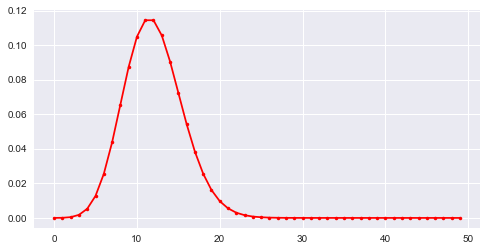



至少出现n次事件的概率 (t=1天)


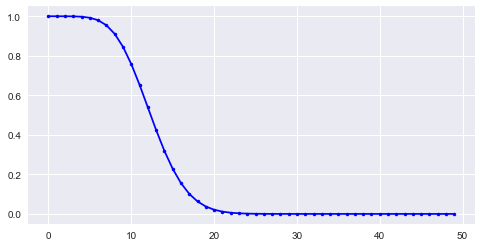

In [33]:
print('pois = Poisson(rate=12)')

fig = plt.figure(figsize = (8, 4))
print('\n\n出现精确n次事件的概率 (t=1天)')
plt.plot(probas_exactly, 'r.-')
plt.show()

fig = plt.figure(figsize = (8, 4))
print('\n\n至少出现n次事件的概率 (t=1天)')
plt.plot(probas_at_least, 'b.-')
plt.show()